In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import torch
from vae_interp.vae import VAE
from vae_interp.dataset import load_nouns_dataset
import matplotlib.pyplot as plt
import numpy as np
from vae_interp.utils import interpolate_vae_latents
import matplotlib.pyplot as plt

In [3]:
vae = VAE(in_channels=3, num_hiddens=[32, 64], latent_dim=4)

In [4]:
x = torch.randn(1, 3, 32, 32)

In [5]:
vae(x)

{'recon': tensor([[[[-0.2993, -0.0225,  0.1464,  ...,  0.2939,  0.1033, -0.2269],
           [-0.1021,  0.0621,  0.1640,  ...,  0.1984,  0.1953,  0.1439],
           [ 0.2261,  0.3138,  0.4609,  ...,  0.1983, -0.4761,  0.0618],
           ...,
           [ 0.1881,  0.0345,  0.3228,  ...,  0.2676,  0.2469,  0.3772],
           [-0.1492, -0.2039, -0.0313,  ..., -0.1077,  0.0834,  0.0760],
           [-0.0078, -0.2363,  0.1693,  ...,  0.0198,  0.0080, -0.0301]],
 
          [[ 0.0422,  0.3962,  0.4207,  ...,  0.9317,  0.5902,  0.5625],
           [ 0.1943,  0.3184,  0.6723,  ...,  0.4938, -0.2365,  0.2358],
           [-0.2702,  0.2171,  0.3569,  ...,  0.3849,  0.4143,  0.2383],
           ...,
           [ 0.2550,  0.2681,  0.2147,  ...,  0.6783, -0.0862,  0.0992],
           [ 0.1130,  0.4763,  0.6468,  ...,  0.3649,  0.3117,  0.0443],
           [ 0.0129,  0.2643,  0.0660,  ...,  0.3582,  0.1179,  0.2672]],
 
          [[ 0.2899,  0.2479,  0.2168,  ...,  0.3153, -0.1315,  0.2803],
    

In [10]:
dataset = load_nouns_dataset(image_size=64, normalize=True)

In [7]:
def evaluate(model, dataset):
    model.eval()
    with torch.no_grad():
        # Get a batch of images
        images = torch.stack([dataset[i] for i in range(25)], dim=0)

        print(images.shape)

        # Reconstruct images
        reconstructed = model(images)["recon"]

        print(reconstructed.shape)

        # Create a pyplot figure
        fig, axes = plt.subplots(5, 10, figsize=(20, 10))
        fig.suptitle(f"Original vs Reconstructed (Iteration)")

        for i in range(25):
            # Original image
            ax = axes[i // 5, (i % 5) * 2]
            img = images[i].cpu().permute(1, 2, 0).numpy()
            img = (img - img.min()) / (img.max() - img.min())  # Normalize to [0, 1]
            ax.imshow(img)
            ax.axis("off")
            if i < 5:
                ax.set_title("Original")

            # Reconstructed image
            ax = axes[i // 5, (i % 5) * 2 + 1]
            img = reconstructed[i].cpu().permute(1, 2, 0).numpy()
            img = (img - img.min()) / (img.max() - img.min())  # Normalize to [0, 1]
            ax.imshow(img)
            ax.axis("off")
            if i < 5:
                ax.set_title("Recon")

        plt.tight_layout()

        # Convert plot to image
        fig.canvas.draw()
        plot_image = torch.from_numpy(
            np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
        )
        plot_image = plot_image.view(fig.canvas.get_width_height()[::-1] + (3,))
        plot_image = plot_image.permute(2, 0, 1)

  

        # plt.close(fig)

torch.Size([25, 3, 64, 64])
torch.Size([25, 3, 64, 64])


/tmp/ipykernel_2206853/2760991701.py:42: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
/tmp/ipykernel_2206853/2760991701.py:41: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  plot_image = torch.from_numpy(


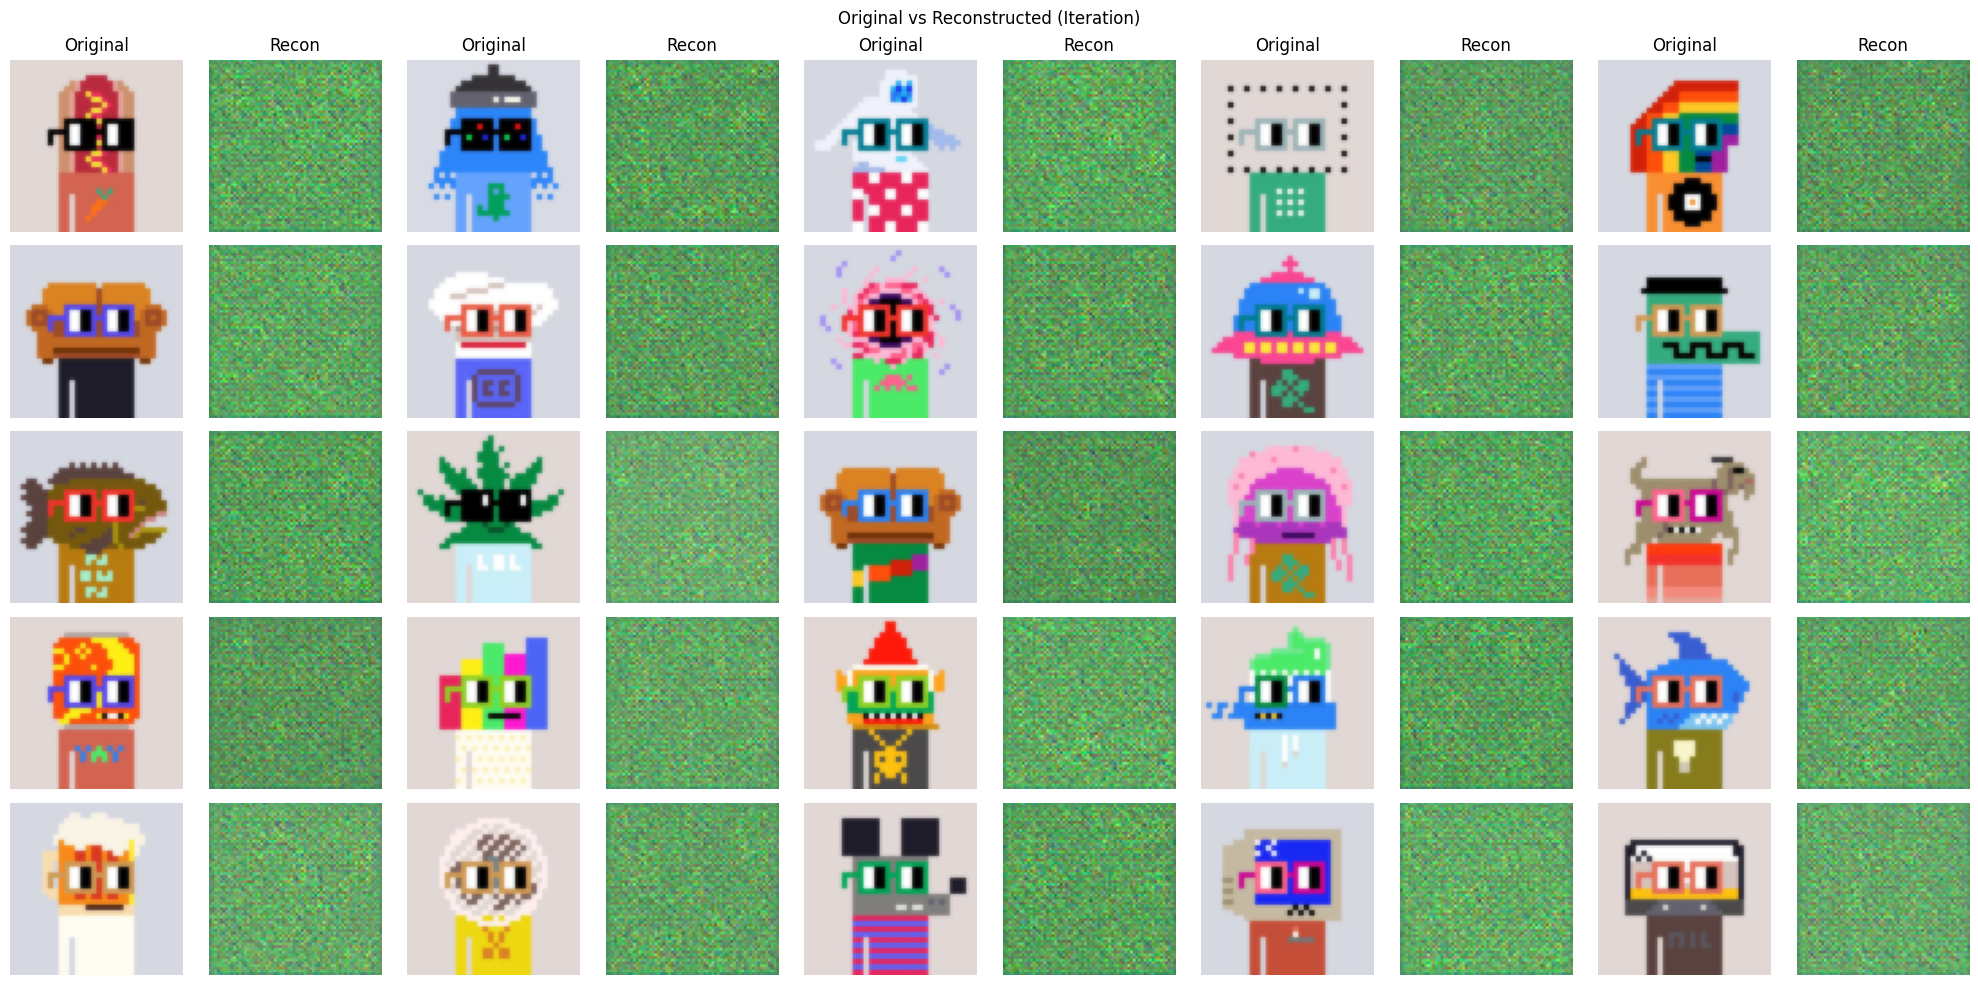

In [8]:
evaluate(vae, dataset)

In [5]:
config_path = "./checkpoints/vae_big/config.json"
weights_path = "./checkpoints/vae_big/vae.pth"
# config_path = "./checkpoints/vae/config.json"
# weights_path = "./checkpoints/vae/vae.pth"

vae = VAE.load_from_checkpoint(config_path, weights_path)

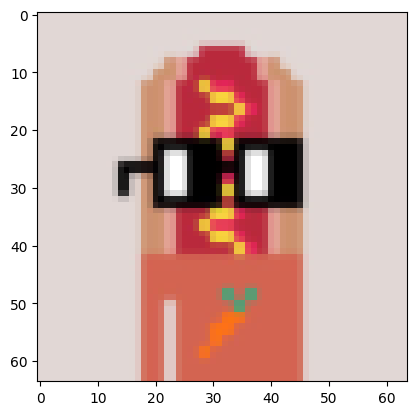

In [15]:
import random
from torch.utils.data import DataLoader

# select 2 random images from dataset
# image1 = dataset[random.randint(0, len(dataset))]
image1 = dataset[0]
image2 = dataset[random.randint(0, len(dataset))]

plt.imshow((image1.permute(1, 2, 0) + 1) * 0.5)

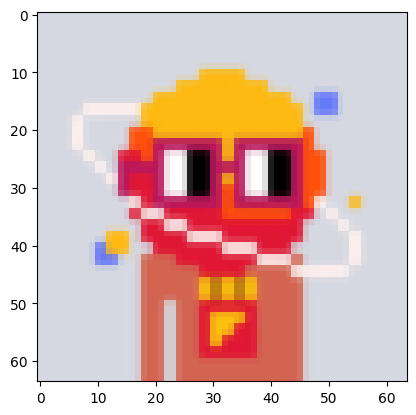

In [16]:
plt.imshow((image2.permute(1, 2, 0) + 1) * 0.5)

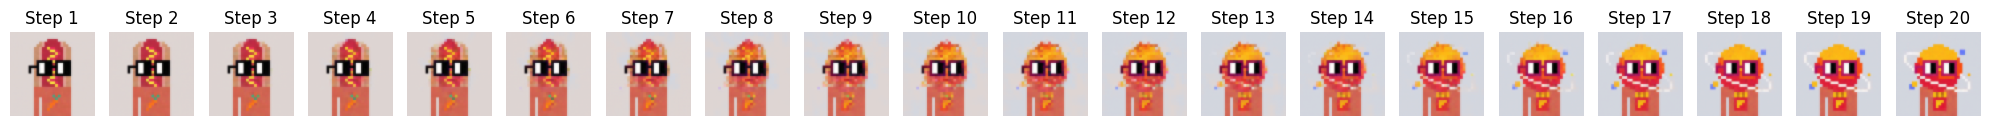

In [17]:
interpolate_vae_latents(
    vae,
    image1,
    image2,
    num_steps=20,
)

In [41]:
dataloader = DataLoader(dataset, batch_size=25, shuffle=False)   

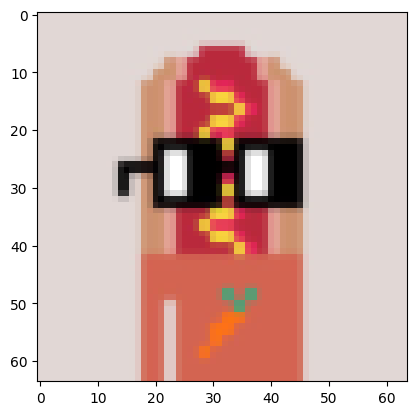

In [42]:
for x in dataloader:
    image = x[0]
    plt.imshow((image.permute(1, 2, 0) + 1) * 0.5)
    break